In [44]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [23]:
ch=pd.read_csv('churn (1).csv')
ch

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,...,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,8260-NGFNY,One,Month-to-month,No,Mailed check,25.20,25.20,Female,0.0,No,...,No,No phone service,DSL,No,No,No,No,No,No,Yes
1,2359-QWQUL,39,One year,Yes,Credit card (automatic),104.70,4134.85,Female,0.0,Yes,...,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Yes
2,6598/RFFVI,2,One year,No,Credit card (automatic),19.30,28.30,Male,0.0,No,...,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes
3,IXSTS-8780,6,Month-to-month,Yes,Electronic check,90.10,521.30,Female,0.0,No,...,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
4,2674/MIAHT,Four,Month-to-month,Yes,Mailed check,80.30,324.20,Female,0.0,No,...,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,9318-NKNFC,One,Month-to-month,Yes,Mailed check,18.85,18.85,Male,0.0,No,...,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes
253,9067-SQTNS,44,One year,No,Bank transfer (automatic),20.60,926.00,Male,0.0,Yes,...,Yes,No,No,Yes,Yes,No internet service,No internet service,Yes,No internet service,No
254,9067-SQTNS,44,One year,No,Bank transfer (automatic),20.60,926.00,Male,0.0,Yes,...,Yes,No,No,Yes,Yes,No internet service,No internet service,Yes,No internet service,No
255,9067-SQTNS,44,One year,No,Bank transfer (automatic),20.60,926.00,Male,0.0,Yes,...,Yes,No,No,Yes,Yes,No internet service,No internet service,Yes,No internet service,No


In [24]:
cs=ch.copy()

In [25]:
cs.isnull().sum()

customerID           0
tenure               0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      10
TotalCharges        15
gender               0
SeniorCitizen        5
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Churn                0
dtype: int64

In [26]:
cs.dtypes

customerID           object
tenure               object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Churn                object
dtype: object

In [27]:
cs=ch.fillna(0)
cs.isnull().sum()

customerID          0
tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Churn               0
dtype: int64

In [28]:
len(cs)

257

In [29]:
cs.shape

(257, 21)

In [30]:
cs.nunique()

customerID          250
tenure               71
Contract              3
PaperlessBilling      2
PaymentMethod         4
MonthlyCharges      215
TotalCharges        235
gender                2
SeniorCitizen         2
Partner               2
Dependents            3
PhoneService          2
MultipleLines         3
InternetService       3
OnlineSecurity        3
OnlineBackup          3
DeviceProtection      3
TechSupport           3
StreamingTV           3
StreamingMovies       3
Churn                 2
dtype: int64

In [31]:
cs_objects=cs.select_dtypes(include='object')
cs_objects.columns

Index(['customerID', 'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn'],
      dtype='object')

In [35]:
cs1=cs_objects.loc[:,cs_objects.nunique()<5]
cs1

,Contract,PaperlessBilling,PaymentMethod,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,Month-to-month,No,Mailed check,Female,No,No,No,No phone service,DSL,No,No,No,No,No,No,Yes
1,One year,Yes,Credit card (automatic),Female,Yes,No,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Yes
2,One year,No,Credit card (automatic),Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes
3,Month-to-month,Yes,Electronic check,Female,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
4,Month-to-month,Yes,Mailed check,Female,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,Month-to-month,Yes,Mailed check,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes
253,One year,No,Bank transfer (automatic),Male,Yes,Yes,Yes,No,No,Yes,Yes,No internet service,No internet service,Yes,No internet service,No
254,One year,No,Bank transfer (automatic),Male,Yes,Yes,Yes,No,No,Yes,Yes,No internet service,No internet service,Yes,No internet service,No
255,One year,No,Bank transfer (automatic),Male,Yes,Yes,Yes,No,No,Yes,Yes,No internet service,No internet service,Yes,No internet service,No


In [36]:
cs1.columns

Index(['Contract', 'PaperlessBilling', 'PaymentMethod', 'gender', 'Partner',
       'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Churn'],
      dtype='object')

In [41]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()


In [42]:
cols=['Contract', 'PaperlessBilling', 'PaymentMethod', 'gender', 'Partner',
       'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Churn']

In [49]:
for cl in cols:
    cs1[cl]=lb.fit_transform(cs1[cl].astype(str))
cs1.head()

,Contract,PaperlessBilling,PaymentMethod,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,0,0,3,0,0,1,0,1,0,0,0,0,0,0,0,1
1,1,1,1,0,1,1,1,0,1,2,0,2,2,2,2,1
2,1,0,1,1,0,1,1,0,2,1,1,1,1,1,1,1
3,0,1,2,0,0,1,1,2,1,0,2,0,0,2,0,1
4,0,1,3,0,0,1,1,2,1,0,2,0,0,0,0,0


In [56]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [57]:
resultant=pd.DataFrame(data=[(0 for i in range(len(cs1.columns)))for i in range(len(cs1.columns))],
                     columns=list(cs1.columns))
resultant.set_index(pd.Index(list(cs1.columns)),inplace=True)

In [69]:
#finding p_value for all columns and putting the resultant matrix
for i in list(cs1.columns):
    for j in list(cs1.columns):
        if i!=j:
            chi2_val,p_val=chi2(np.array(cs1[i]).reshape(-1,1),cs1.Churn)
            resultant.loc[i,j]=p_val       
resultant.sort_values('Churn')
dchi=resultant.sort_values('Churn').Churn
dchi
        

Churn               0.000000e+00
Contract            3.827356e-11
TechSupport         1.000019e-06
OnlineSecurity      2.550207e-06
OnlineBackup        1.312224e-03
DeviceProtection    6.547274e-03
PaperlessBilling    8.718533e-03
PaymentMethod       9.370519e-02
Partner             9.602615e-02
StreamingMovies     3.078210e-01
MultipleLines       4.036062e-01
InternetService     4.290701e-01
Dependents          4.400060e-01
StreamingTV         4.879888e-01
PhoneService        8.639745e-01
gender              9.047876e-01
Name: Churn, dtype: float64

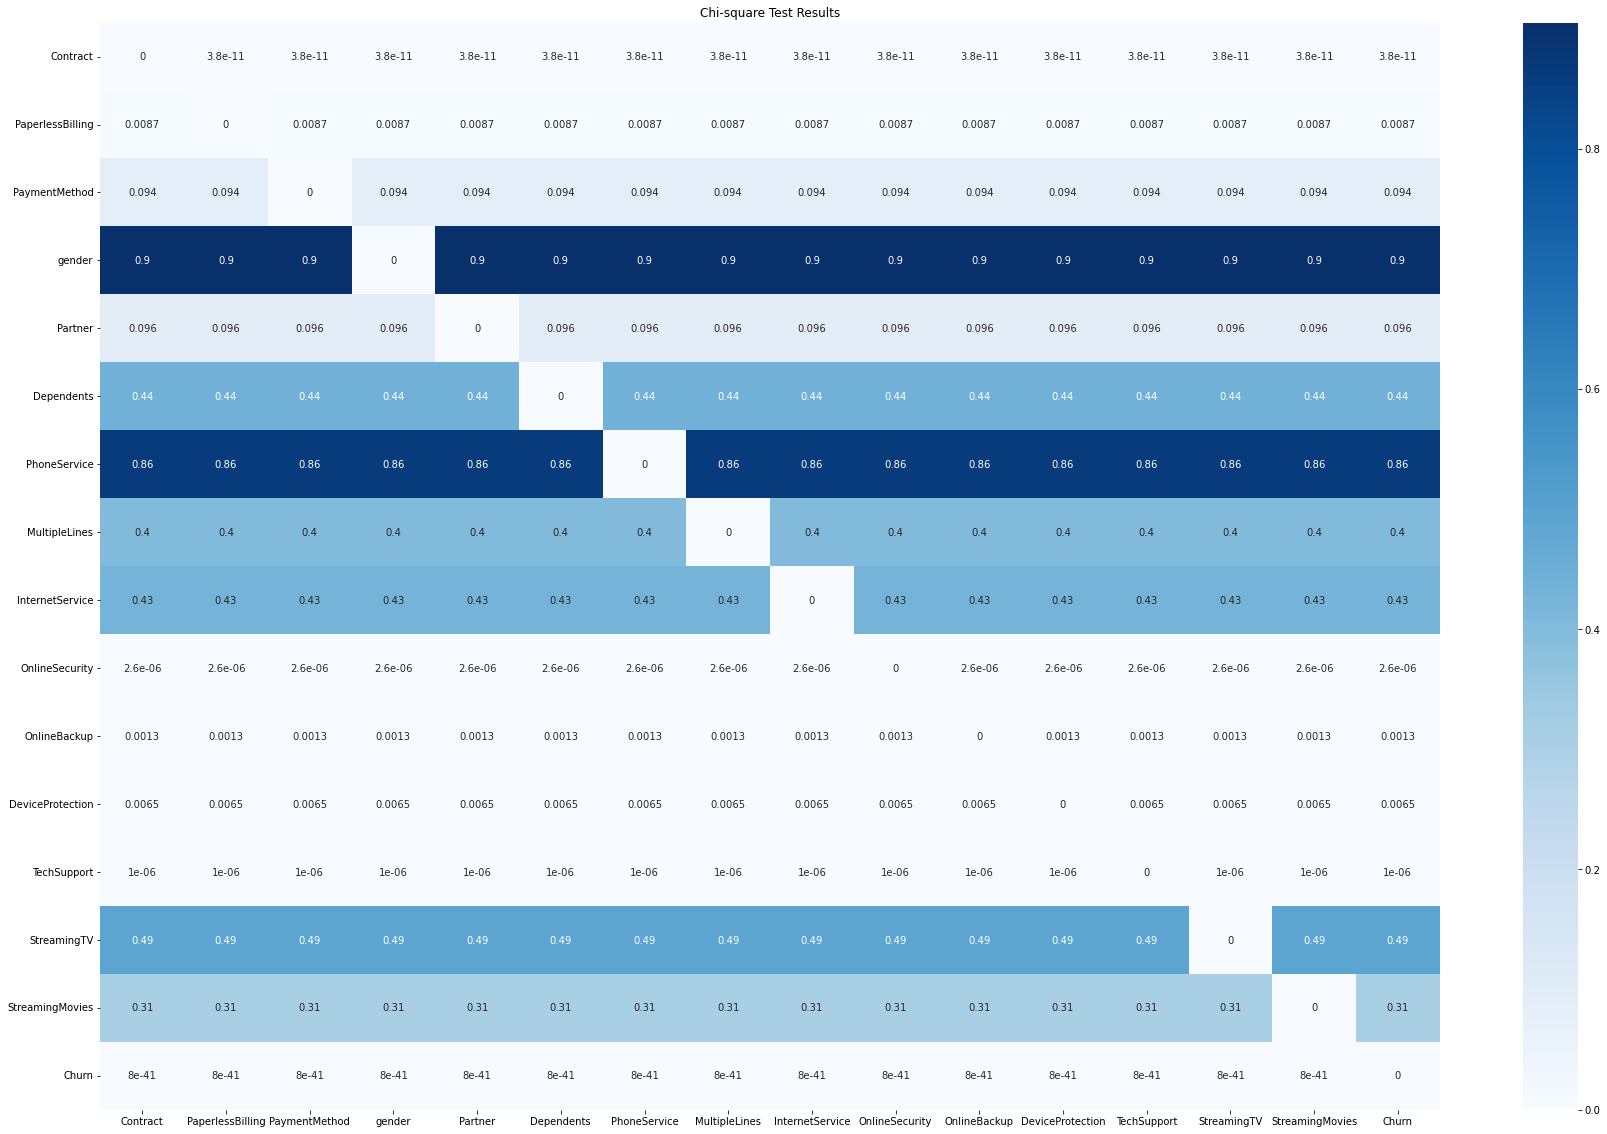

In [70]:
import seaborn as sb
import matplotlib.pyplot as plt
fig =plt.figure(figsize=(30,20))
sb.heatmap(resultant,annot=True, cmap='Blues')
plt.title('Chi-square Test Results')
plt.show()

In [71]:
house=pd.read_csv('housing (1).csv') 
house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [73]:
housep=house.copy()

In [75]:
housep.fillna(0)
housep.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [76]:
housep.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [79]:
#median is for float(continuous variable)
housep['total_bedrooms']=housep['total_bedrooms'].fillna(housep['total_bedrooms'].median())

In [78]:
housep.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [81]:
housep=pd.get_dummies(housep,columns=['ocean_proximity'])
housep

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


<AxesSubplot:>

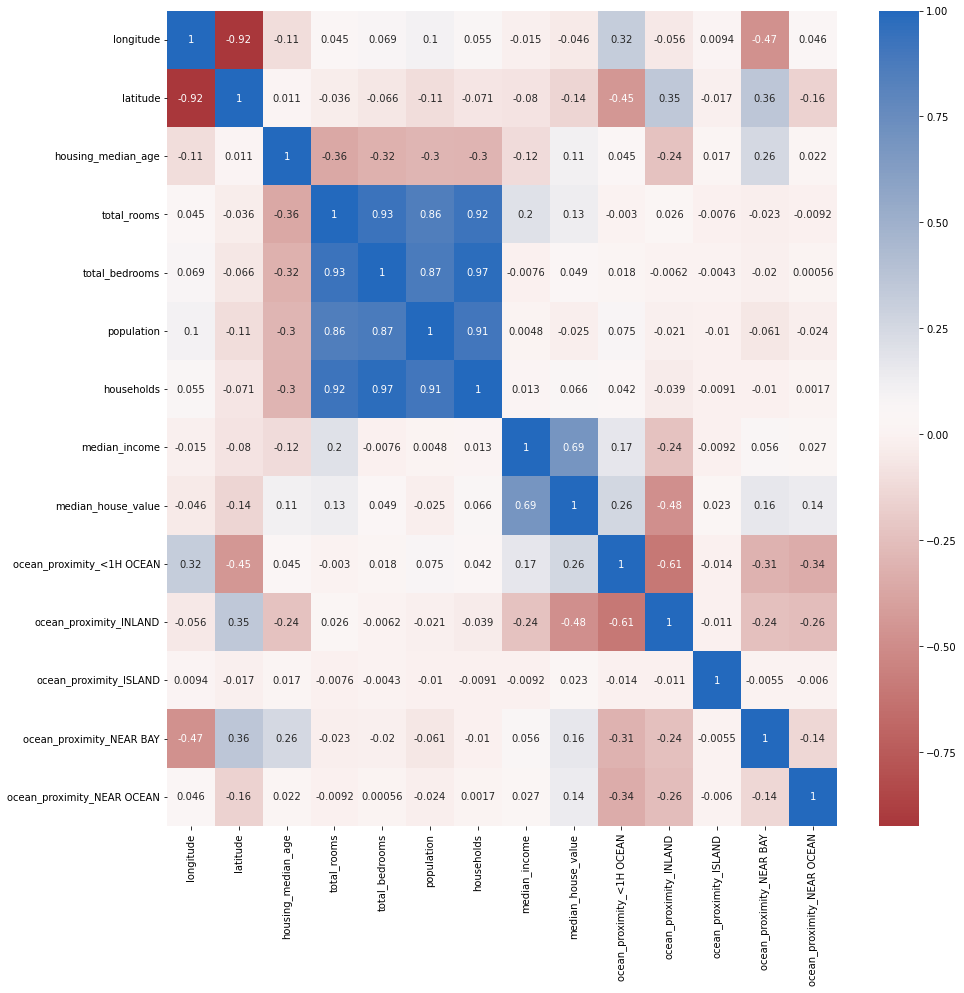

In [83]:
plt.figure(figsize=(15,15))
cor=housep.corr()
sb.heatmap(cor,annot=True,cmap='vlag_r')

In [84]:
coff=abs(cor['median_house_value'])
coff=coff[coff>0.05]
coff.sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_INLAND        0.484859
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
latitude                      0.144160
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
Name: median_house_value, dtype: float64